In [1]:
import pandas as pd

## Data preparation

### Merge measurements with elevation

In [4]:
measurements = pd.read_csv("measurements-out-2903-q1-995.csv")

elevation = pd.read_csv("elevation_all.csv")

dropped = elevation.dropna(subset=["elevation"])

merged = measurements.merge(elevation,how="left",left_on=["latitude","longitude"],right_on=["lat","lon"])

merged.to_csv("measurements_with_elevation.csv",index=None)

In [6]:
len(measurements)

### Remove measurements without elevation

In [7]:
# merged = pd.read_csv("measurements_with_elevation.csv")

mdropped = merged.dropna(subset=["elevation"])

del mdropped["lat"]
del mdropped["lon"]

mdropped.reset_index(inplace=True)

del mdropped["index"]

mdropped.to_csv("measurements_with_elevation_cleaned.csv",index=None)

In [10]:
len(mdropped)

15784806

In [2]:
# import pandas as pd
# mdropped = pd.read_csv("measurements_with_elevation_cleaned.csv")

## Elevation distribution

In [15]:
grouped = mdropped.groupby(["longitude","latitude"]).first()

In [9]:
from matplotlib.pyplot import figure

Text(0, 0.5, 'Number of places')

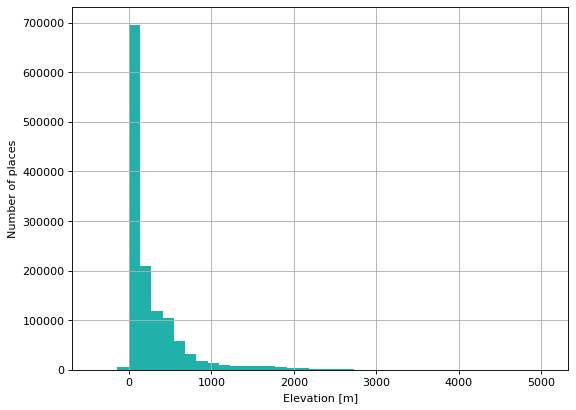

In [16]:
figure(figsize=(8,6), dpi=80)

ax = grouped["elevation"].hist(bins=40,color="lightseagreen")
ax.set_xlabel("Elevation [m]")
ax.set_ylabel("Number of places")

## Analysis of correlation between radiation and elevation

### Different measurements for the same coordination treated as different samples

In [3]:
df = mdropped[["radiation","elevation"]]

In [4]:
df

,radiation,elevation
0,0.025714,23.0
1,0.117143,23.0
2,0.037143,134.0
3,0.125714,134.0
4,0.214286,61.0
...,...,...
15784801,0.111429,7.0
15784802,0.111429,6.0
15784803,0.114286,0.0
15784804,0.108571,20.0


In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [20]:
print('Radiation: mean=%.3f stdv=%.3f max=%.3f min=%.3f' % (np.mean(df["radiation"]), np.std(df["radiation"]), np.max(df["radiation"]), np.min(df["radiation"])))
print('Elevation: mean=%.3f stdv=%.3f max=%.3f min=%.3f' % (np.mean(df["elevation"]), np.std(df["elevation"]), np.max(df["elevation"]), np.min(df["elevation"])))

Radiation: mean=0.098 stdv=0.066 max=2.351 min=0.005
Elevation: mean=161.298 stdv=235.667 max=5053.000 min=-413.000


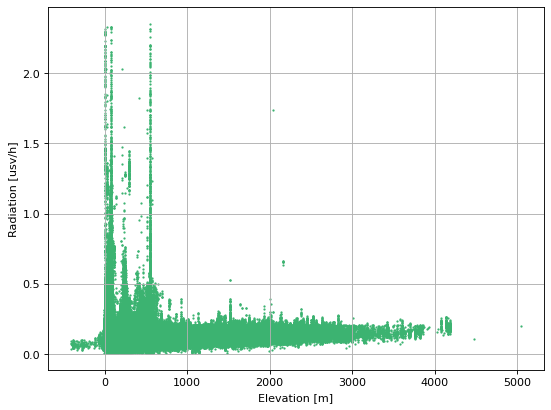

In [25]:
figure(figsize=(8,6), dpi=80)
plt.scatter(df["elevation"],df["radiation"],color="mediumseagreen",s=1)
plt.xlabel("Elevation [m]")
plt.ylabel("Radiation [usv/h]")
plt.grid()
plt.show()

In [26]:
corr, _ = pearsonr(df["elevation"],df["radiation"])
print(f"Pearsons correlation: %.3f" % (corr))

Pearsons correlation: 0.005


#### Elevation below 700 m

In [5]:
below_700 = df[df["elevation"]<700]
print(f"Number of samples: {len(below_700)}")

Number of samples: 15515488


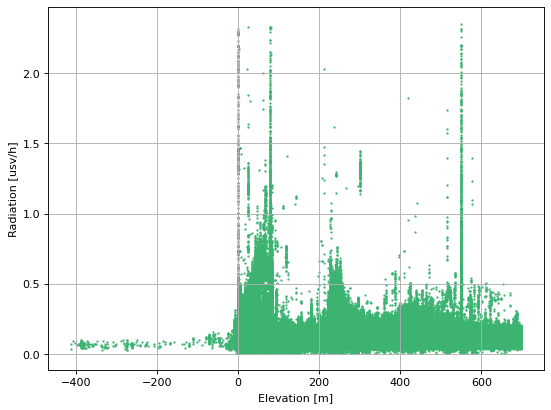

In [11]:
figure(figsize=(8,6), dpi=80)
plt.scatter(below_700["elevation"],below_700["radiation"],color="mediumseagreen",s=1)
plt.xlabel("Elevation [m]")
plt.ylabel("Radiation [usv/h]")
plt.grid()
plt.show()

In [12]:
b700_corr, _ = pearsonr(below_700["elevation"],below_700["radiation"])
print(f"Pearsons correlation: %.3f" % (b700_corr))

Pearsons correlation: -0.054


#### Elevation above 700 m

In [13]:
above_700 = df[df["elevation"]>=700]
print(f"Number of samples: {len(above_700)}")

Number of samples: 269318


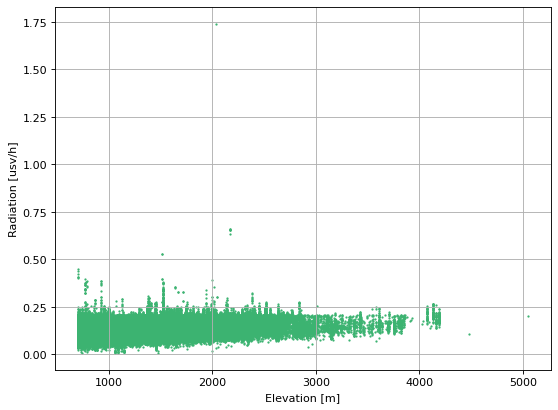

In [14]:
figure(figsize=(8,6), dpi=80)
plt.scatter(above_700["elevation"],above_700["radiation"],color="mediumseagreen",s=1)
plt.xlabel("Elevation [m]")
plt.ylabel("Radiation [usv/h]")
plt.grid()
plt.show()

In [28]:
a700_corr, _ = pearsonr(above_700["elevation"],above_700["radiation"])
print(f"Pearsons correlation: %.3f" % (a700_corr))

Pearsons correlation: 0.371


### Taking median values of measurements for the same coordinations

In [15]:
df_median = mdropped.groupby(by=["latitude","longitude"]).median()
df_median.reset_index(inplace=True)

In [16]:
print(f"Number of samples: {len(df_median)}")

Number of samples: 1312236


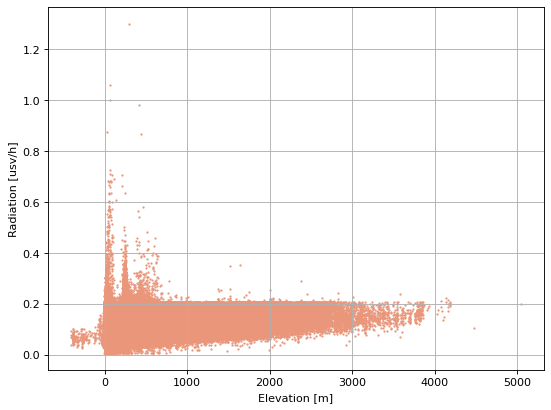

In [18]:
figure(figsize=(8,6), dpi=80)
plt.scatter(df_median["elevation"],df_median["radiation"],color="darksalmon",s=1)
plt.xlabel("Elevation [m]")
plt.ylabel("Radiation [usv/h]")
plt.grid()
plt.show()

In [61]:
median_corr, _ = pearsonr(df_median["elevation"],df_median["radiation"])
print(f"Pearsons correlation: %.3f" % (median_corr))

Pearsons correlation: 0.263
